In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

plt.style.use(['ggplot'])

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
directory_root = '/content/drive/My Drive/SampleSuperstore.csv'

In [5]:
df = pd.read_csv(directory_root)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.shape


(9994, 13)

In [10]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
pip install squarify

In [14]:
df_a= df.groupby('Region', axis=0).sum()
df_a

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151523188,500782.8528,8768,557.14,39655.8752
East,50099338,678435.1960,10609,413.50,91506.3092
South,55875052,391721.9050,6209,238.55,46749.4303
West,292783499,725255.6365,12234,350.00,108329.8079


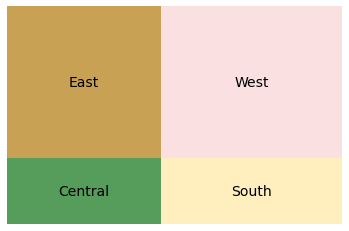

In [15]:
import squarify
labels=['Central','East','South','West']
profits= [39655.8752,91506.3092,46749.4303,108329.8079]
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

plt.rc('font', size=14)
squarify.plot(sizes=profits, label=labels,
              color=color_list, alpha=0.7)
plt.axis('off')

plt.show()

## **It can be observed that East and West region has maximum profits, whereas Central and South region needs improvements.**

In [16]:
del df_a['Postal Code']

In [17]:
dfa=df_a[['Sales']]

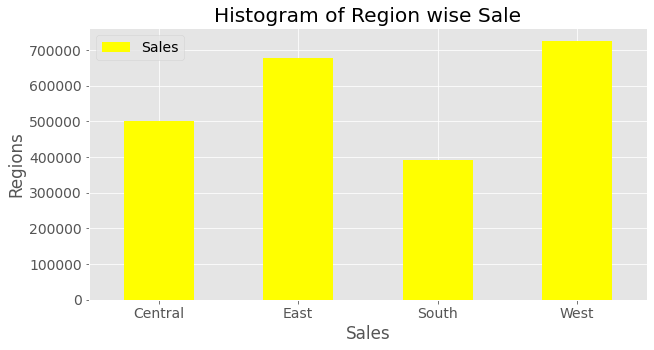

In [18]:
dfa.plot(kind='bar', figsize=(10, 5),color='yellow')
plt.xticks(rotation=0)

plt.title('Histogram of Region wise Sale') # add a title to the histogram
plt.ylabel('Regions') # add y-label
plt.xlabel('Sales') # add x-label

plt.show()

### **It can be observed that the West Region has the highest Sales and South Region has the lowest Sales.**

In [19]:
df1 = df[['Category', 'Sales']].copy()
df1.head()

,Category,Sales
0,Furniture,261.9600
1,Furniture,731.9400
2,Office Supplies,14.6200
3,Furniture,957.5775
4,Office Supplies,22.3680


In [20]:
df1.set_index('Category')

,Sales
Category,
Furniture,261.9600
Furniture,731.9400
Office Supplies,14.6200
Furniture,957.5775
Office Supplies,22.3680
...,...
Furniture,25.2480
Furniture,91.9600
Technology,258.5760


In [21]:
df1= df1.groupby('Category', axis=0).sum()

In [22]:
df1

,Sales
Category,
Furniture,741306.3133
Office Supplies,718735.2440
Technology,836154.0330


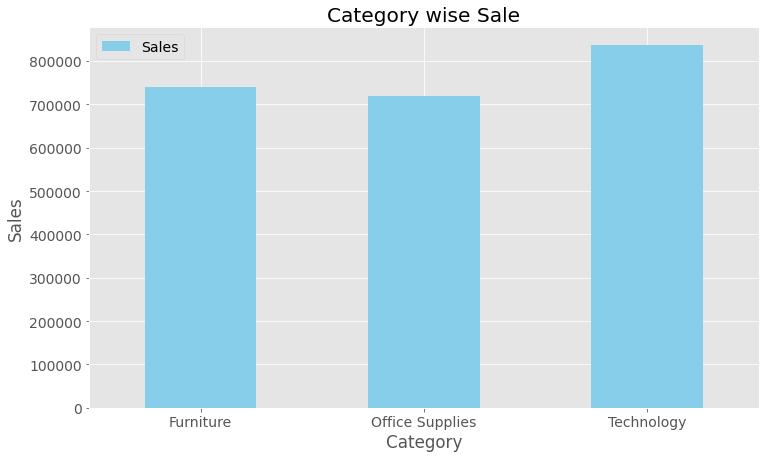

In [23]:
df1.plot(kind='bar',color='skyblue',figsize=(12,7))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Sales') # add y-label to the plot
plt.title('Category wise Sale') # add title to the plot
plt.xticks(rotation=0)
plt.show()

## **Technology has maximum Sales whereas Office Supplies has the minimum.**


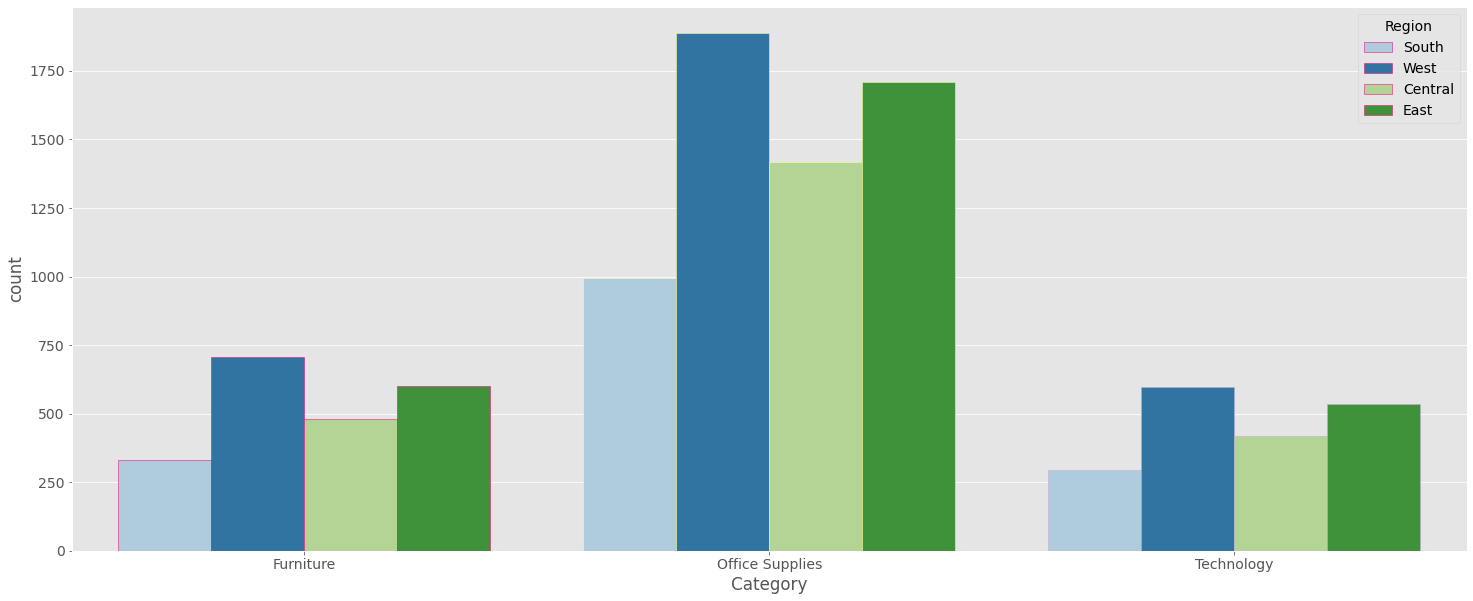

In [24]:
plt.figure(figsize=(25,10))
sns.countplot(x='Category',hue='Region',data=df,palette='Paired',edgecolor=sns.color_palette("Accent_r", 3))
plt.xticks(rotation=0)
plt.show()

## **Category versus Region**

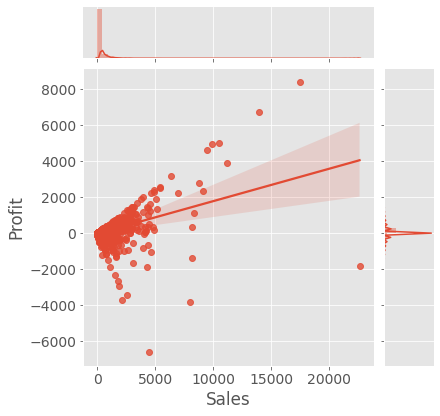

In [25]:
sns.jointplot("Sales", "Profit", data=df, kind='reg');

## **Sales versus Profit**

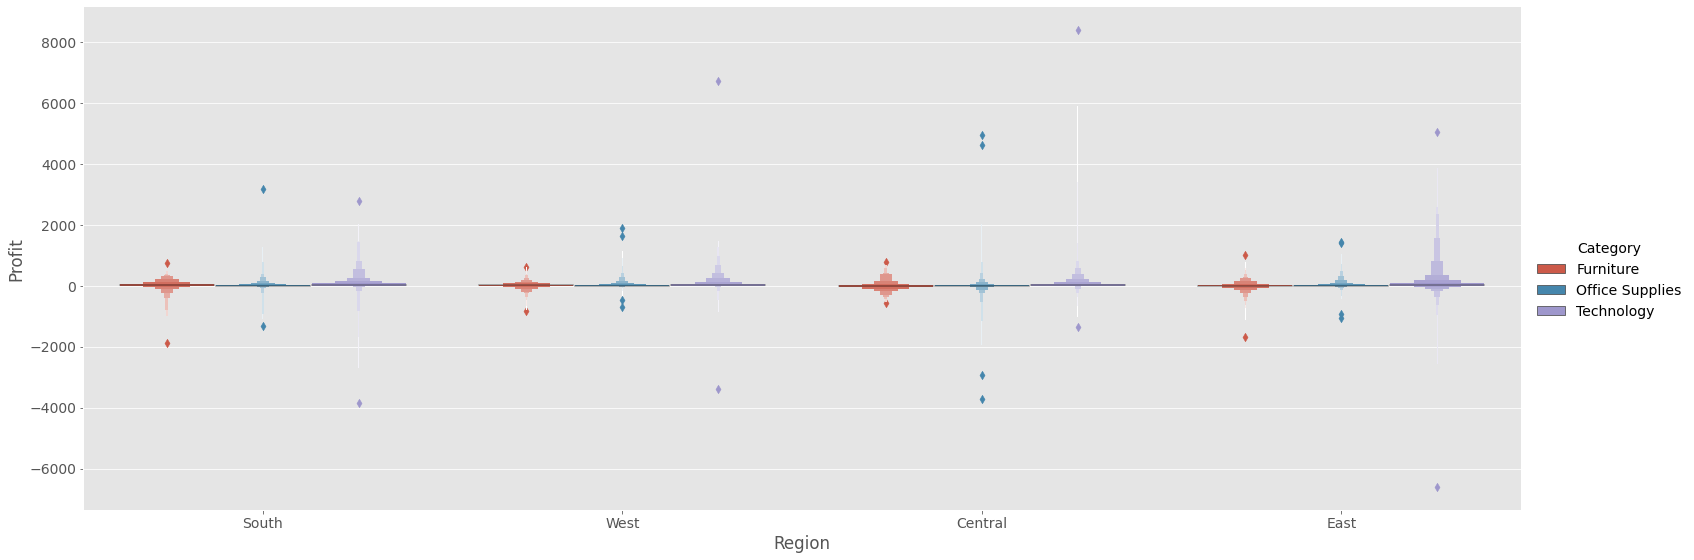

In [27]:
sns.catplot(x="Region", y="Profit", data=df, kind="boxen",height=8, aspect=2.7, hue = "Category")


## **Catplot of Region versus Profit**

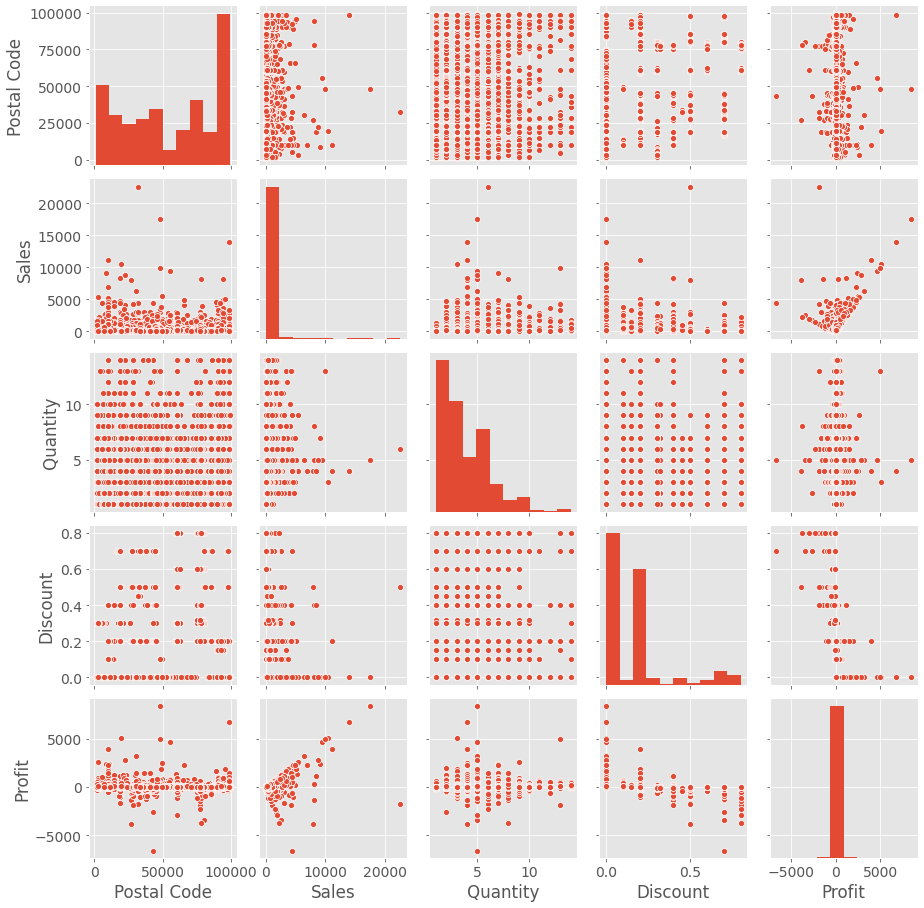

In [28]:
sns.pairplot(df)

# **Pairplot**

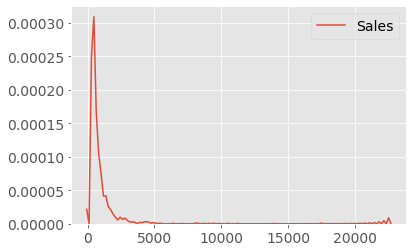

In [29]:
sns.kdeplot(df['Sales']);

In [30]:
y=df['Sales']
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9977, dtype: float64

[]

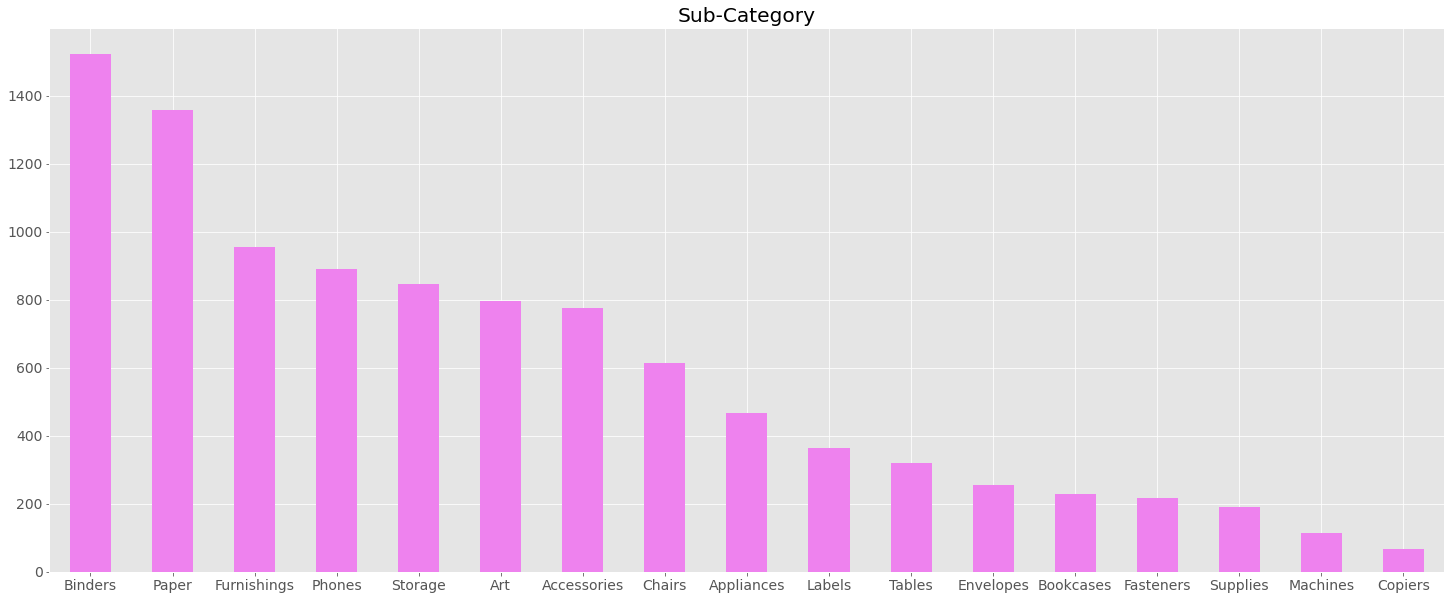

In [31]:
plt.figure(figsize = (25,10))
df['Sub-Category'].value_counts().plot(kind = 'bar',color="violet")
plt.xticks(rotation=0)
plt.title('Sub-Category')
plt.plot()

### **It can be observed that Binders, Paper, Furnishing are among the most popular products whereas Copiers and Machines are not.**

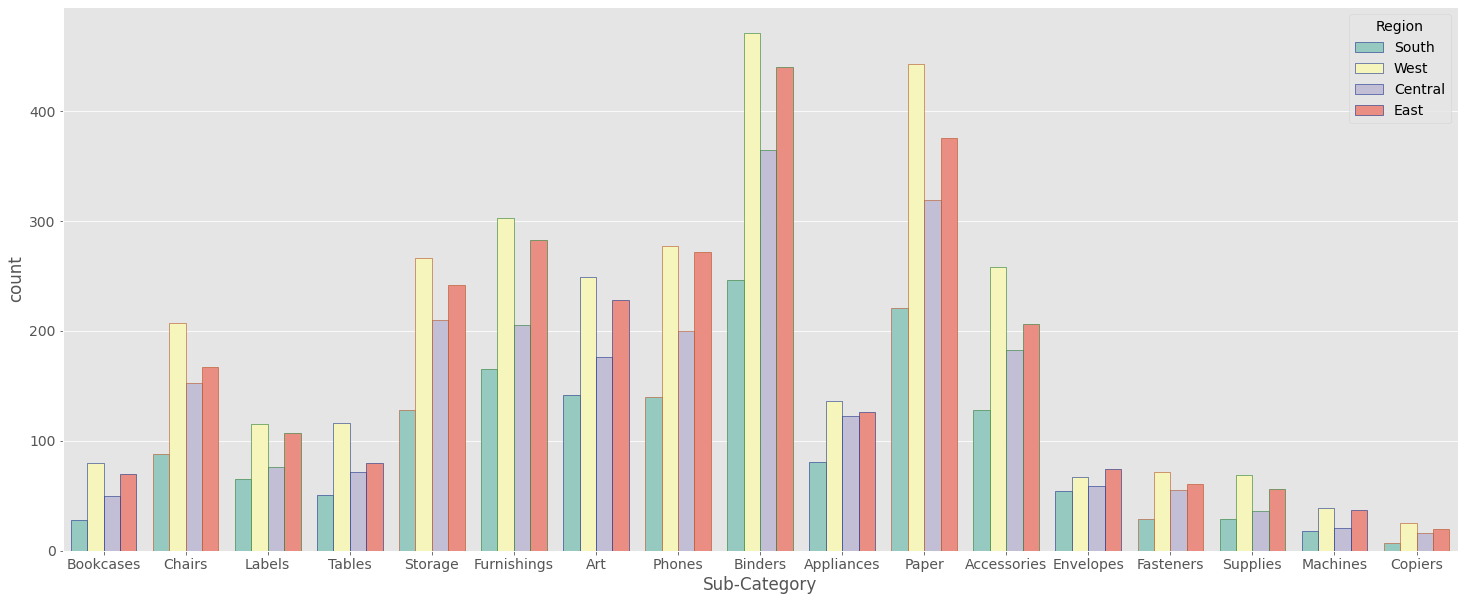

In [32]:
# Counts of Sub-Category Region-Wise
plt.figure(figsize=(25,10))
sns.countplot(x='Sub-Category',hue='Region',data=df,palette='Set3',edgecolor=sns.color_palette("dark", 3))
plt.xticks(rotation=0)
plt.show()

## **Region wise subcategories can be evaluated.**
**Subcategories needing improvement are-**

1.   Copiers
2.   Machines
3.   Supplies
4.   Fasteners
5.   Envelopes

In [33]:

df_items=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_items.reset_index(drop=True,inplace=True)

Text(0.5, 11.120000000000019, 'Products')

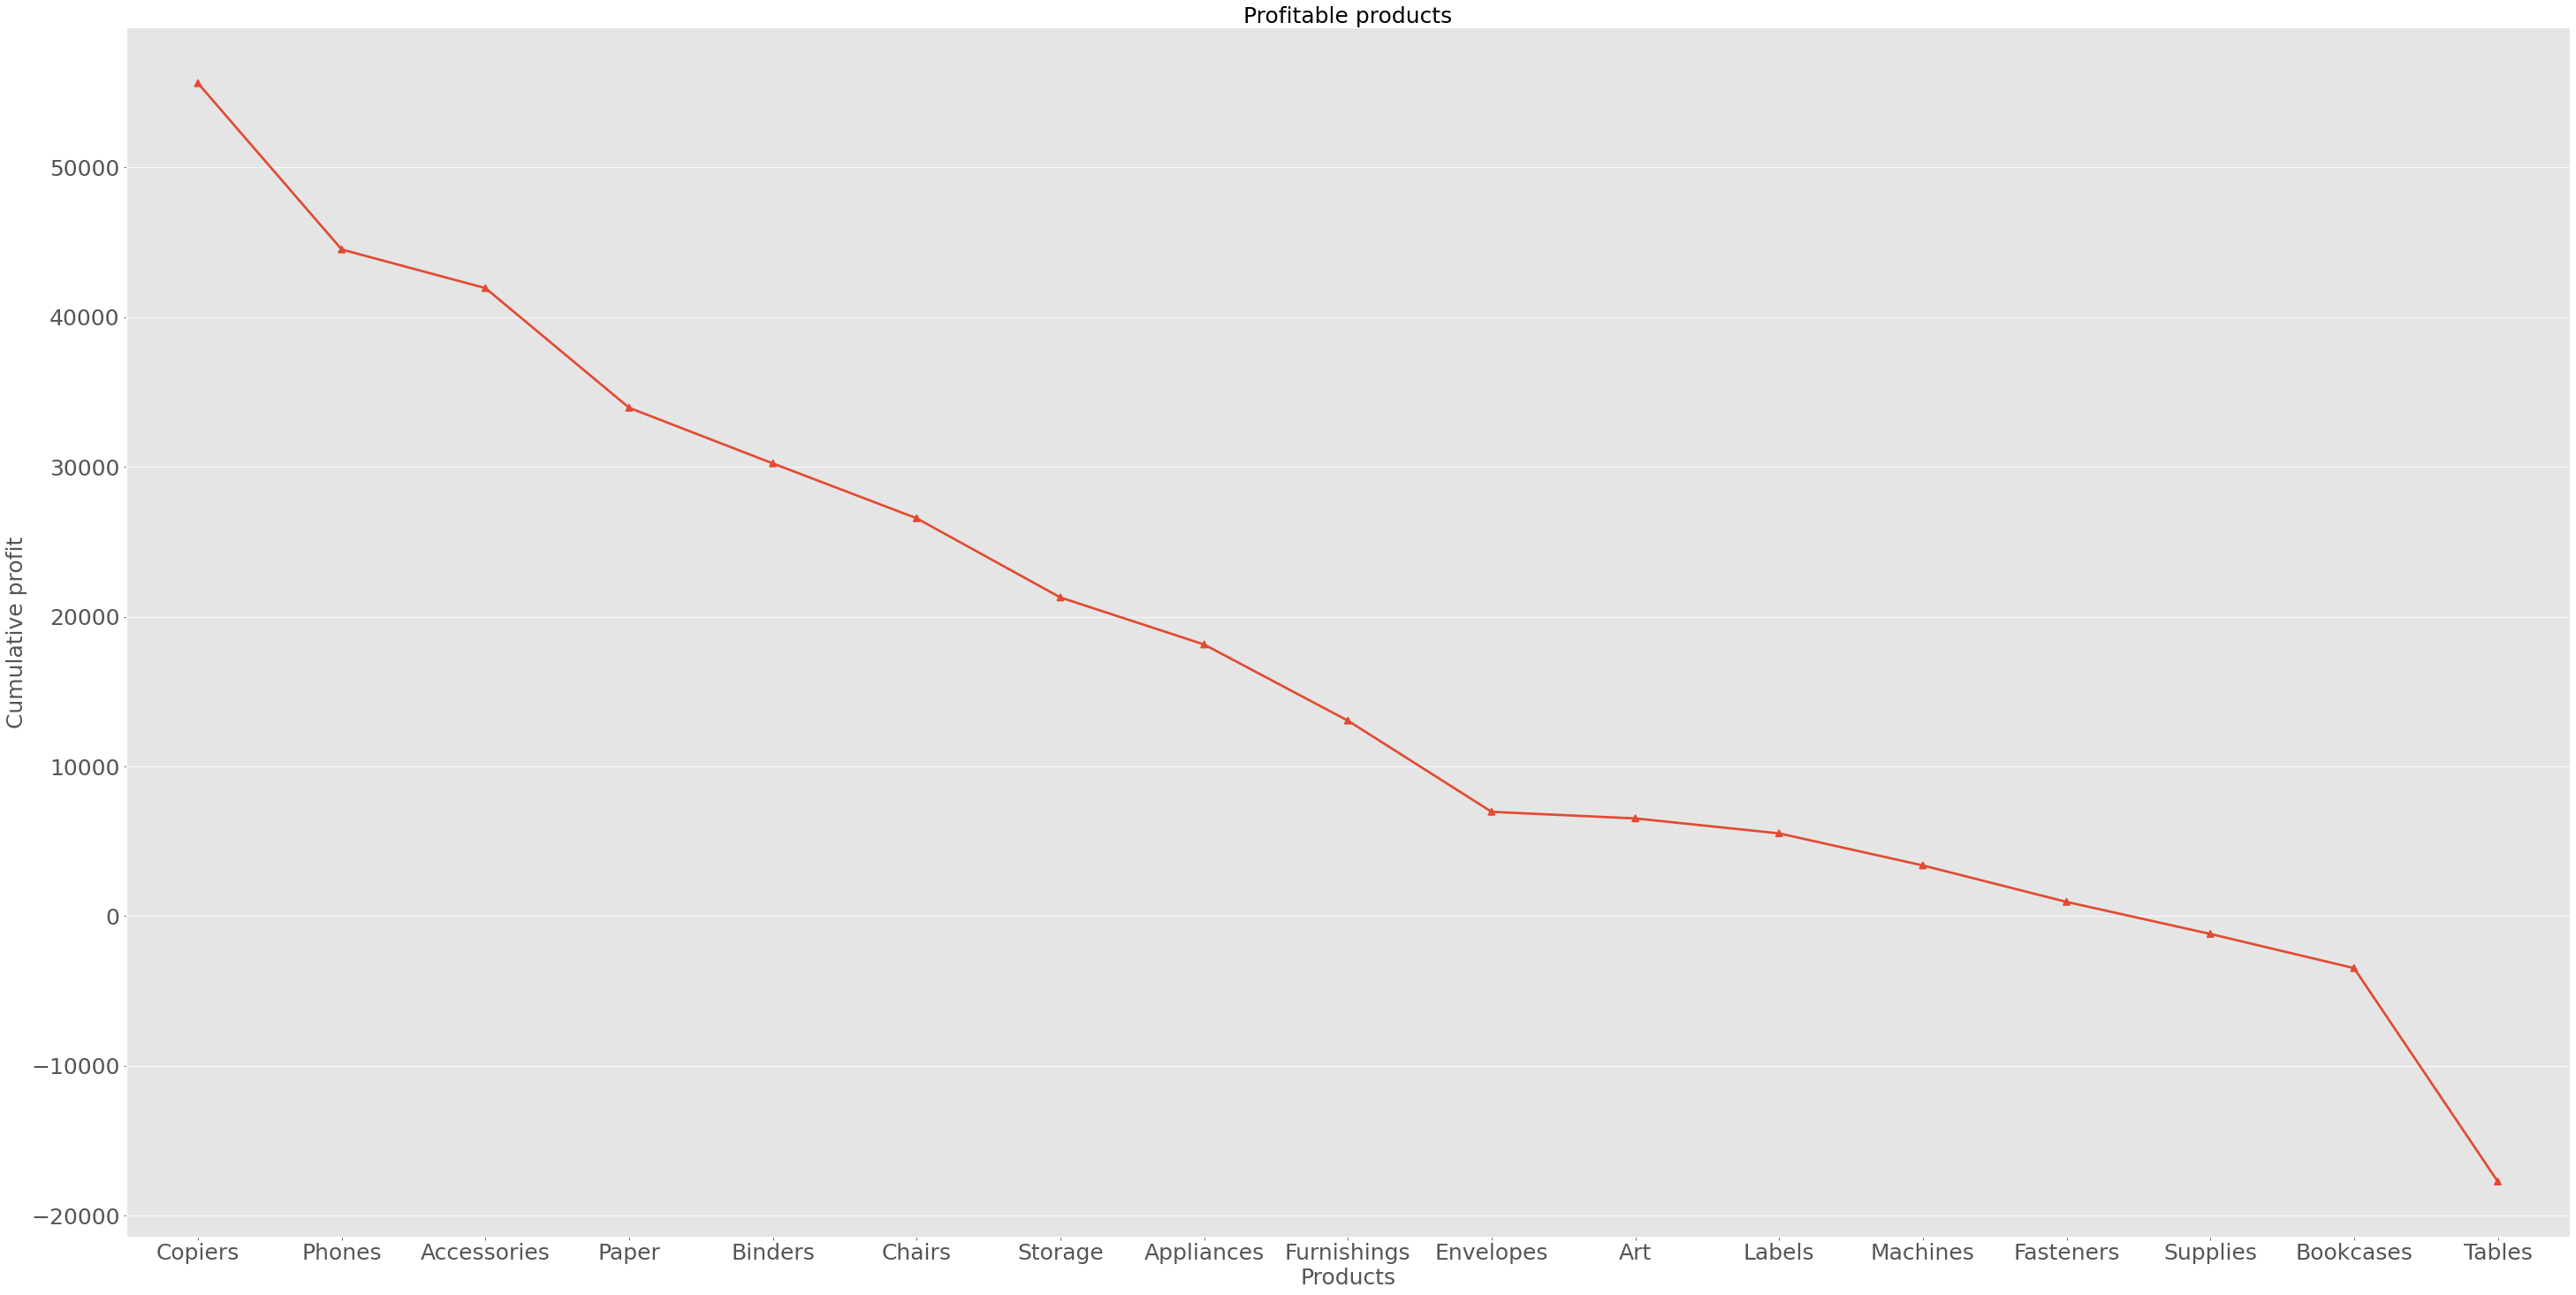

In [34]:
sns.catplot('Sub-Category','Profit',data=df_items,kind='point',aspect=2,height=20,alpha=0.5, markers = '^')
plt.title('Profitable products',size=25)
plt.xticks(size=25)
plt.yticks(size=25)
plt.ylabel('Cumulative profit',size=25)
plt.xlabel('Products',size=25)

### **Sub-Categories versus Profit**


---




In [35]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

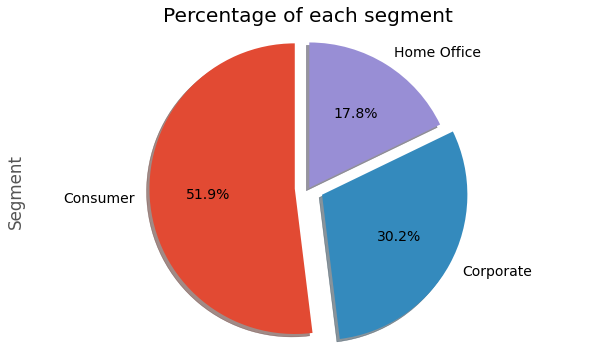

In [36]:
#df['Sub-Category'].value_counts().plot.pie(autopct = "%1.1f%%",figsizedf_)
explode_list = [0.1, 0.1, 0]
df['Segment'].value_counts().plot(kind='pie',
                            figsize=(10,6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True, 
                            explode=explode_list      # add shadow      
                            )

plt.title('Percentage of each segment')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### **The Consumer segment is most active and the Home Office is  least active**

In [37]:
df.set_index('City')

,Ship Mode,Segment,Country,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
City,,,,,,,,,,,,
Henderson,Second Class,Consumer,United States,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Henderson,Second Class,Consumer,United States,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Los Angeles,Second Class,Corporate,United States,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Fort Lauderdale,Standard Class,Consumer,United States,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Fort Lauderdale,Standard Class,Consumer,United States,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
Miami,Second Class,Consumer,United States,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
Costa Mesa,Standard Class,Consumer,United States,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
Costa Mesa,Standard Class,Consumer,United States,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


In [38]:
dfz=df.groupby('Ship Mode',axis=0).sum()

In [39]:
dfz

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,84152470,3.513805e+05,5690,252.97,48953.6561
Same Day,31147971,1.283217e+05,1956,82.75,15871.8869
Second Class,108033820,4.591770e+05,7418,269.35,57446.6516
Standard Class,326946816,1.357316e+06,22756,954.12,163969.2280


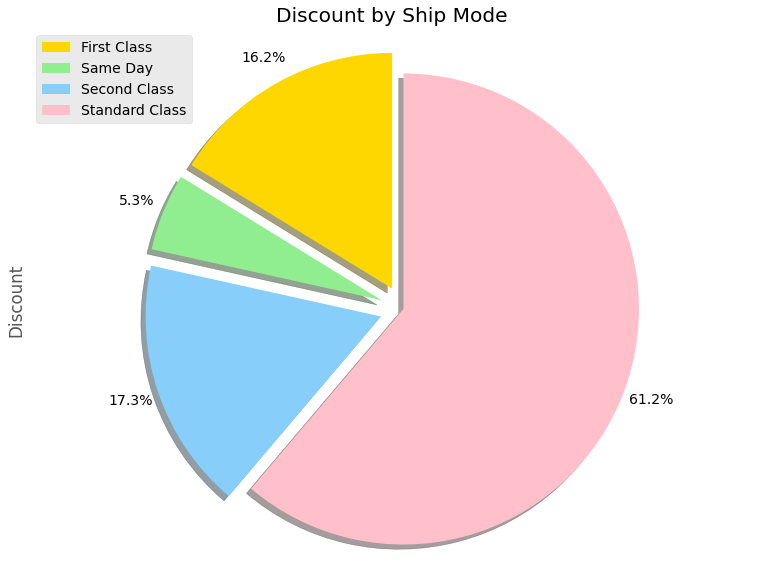

In [40]:
colors_list = ['gold', 'lightgreen', 'lightskyblue', 'pink']
# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0.1, 0.1, 0]

dfz['Discount'].plot(kind='pie',
                            figsize=(13, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,
                     explode=explode_list)

# scale the title up by 12% to match pctdistance
plt.title('Discount by Ship Mode') 

plt.axis('equal') 

# add legend
plt.legend(labels=dfz.index, loc='upper left') 

plt.show()

## **Discount versus Ship Mode**

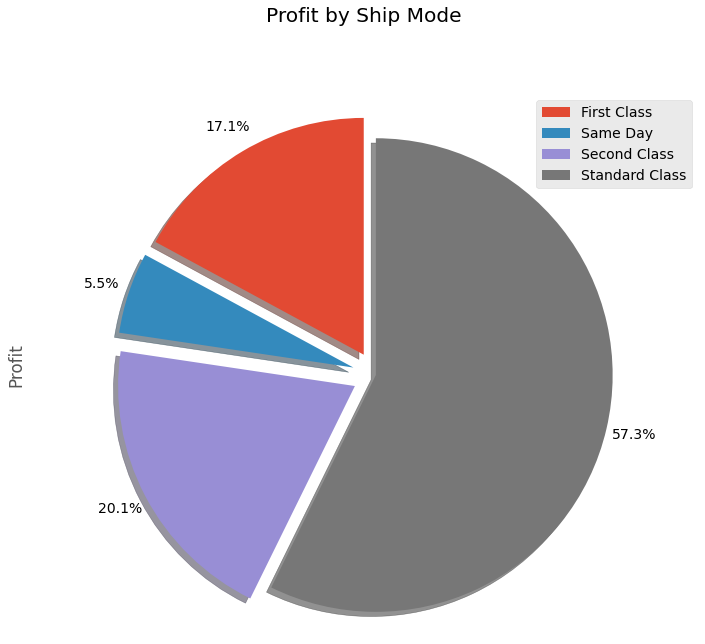

In [41]:


explode_list = [0.1,0.1, 0.1,0]
dfz['Profit'].plot(kind='pie',
                            figsize=(12,10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,
                   explode=explode_list   # the ratio between the center of each pie slice and the start of the text generated by autopct 
                          )

# scale the title up by 12% to match pctdistance
plt.title('Profit by Ship Mode', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=dfz.index, loc='upper right') 

plt.show()

# **Profit versus Ship mode**

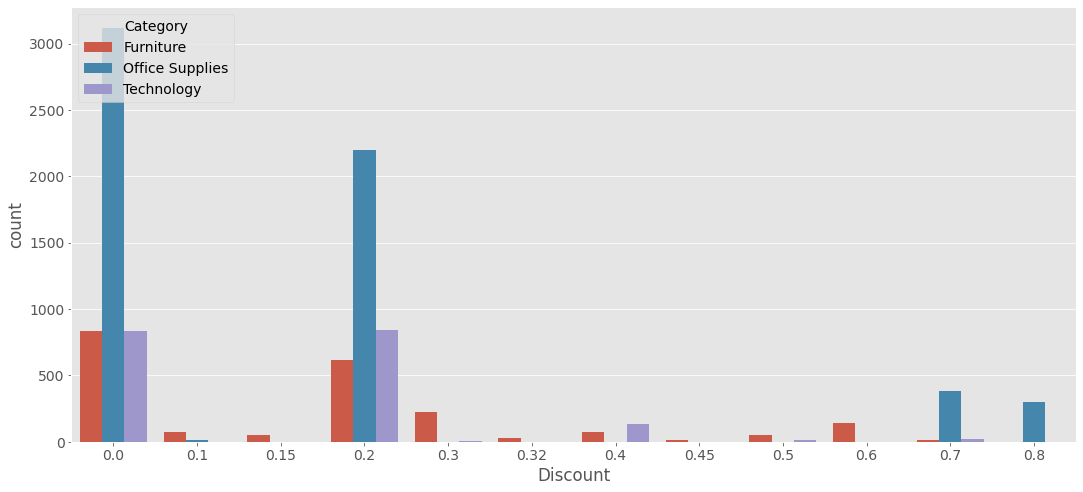

In [42]:
plt.figure(figsize=(18,8))
sns.countplot(x='Discount',hue='Category',data=df)

# **Discount versus Category**

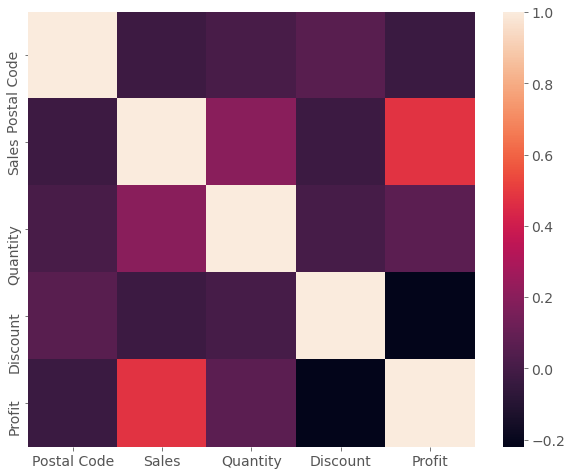

In [43]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr())
plt.show()

## **Correlation Matrix**

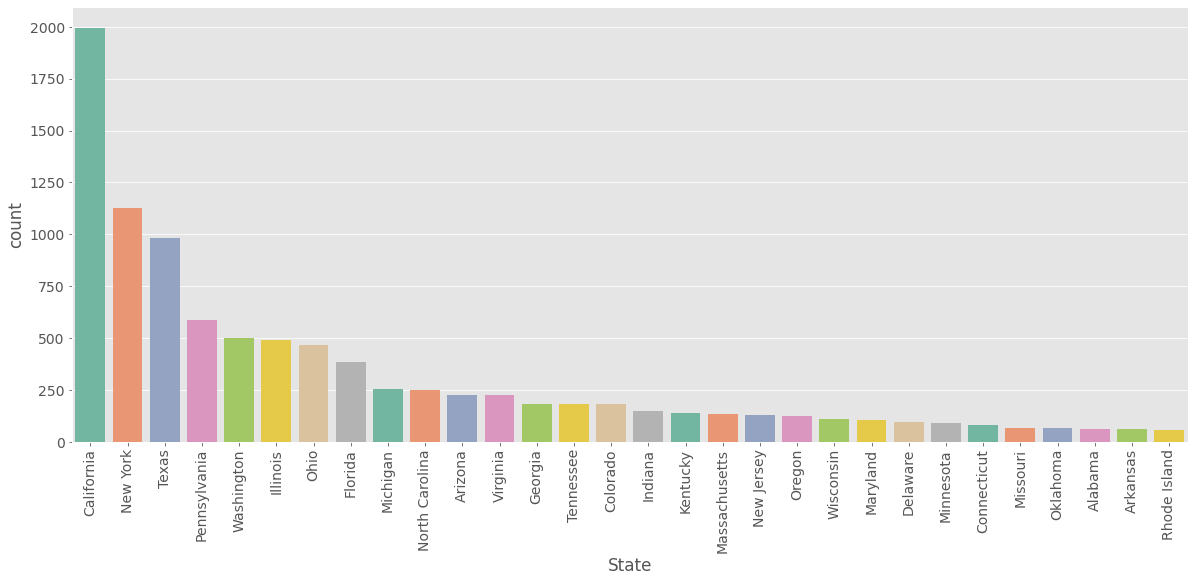

In [44]:
plt.figure(figsize= (20 , 8 ))
sns.countplot(df['State'],order=(df['State'].value_counts().head(30)).index,palette='Set2')
plt.xticks(rotation=90)
plt.show()


### **California, New York ,Texas seem to be active whereas Rhode Island, Arkansas ,Albama need attention.**

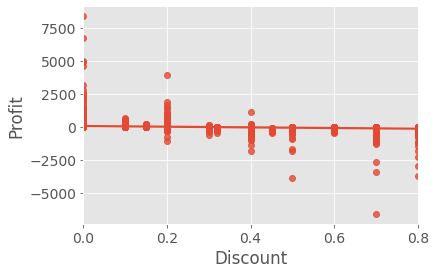

In [45]:

sns.regplot( x="Discount",
            y = "Profit",  
            data = df,scatter=True) 

# **Relation between Discount and Profit.**

In [46]:
dfq=df[['Sales','Quantity','Discount','Profit','Region']]

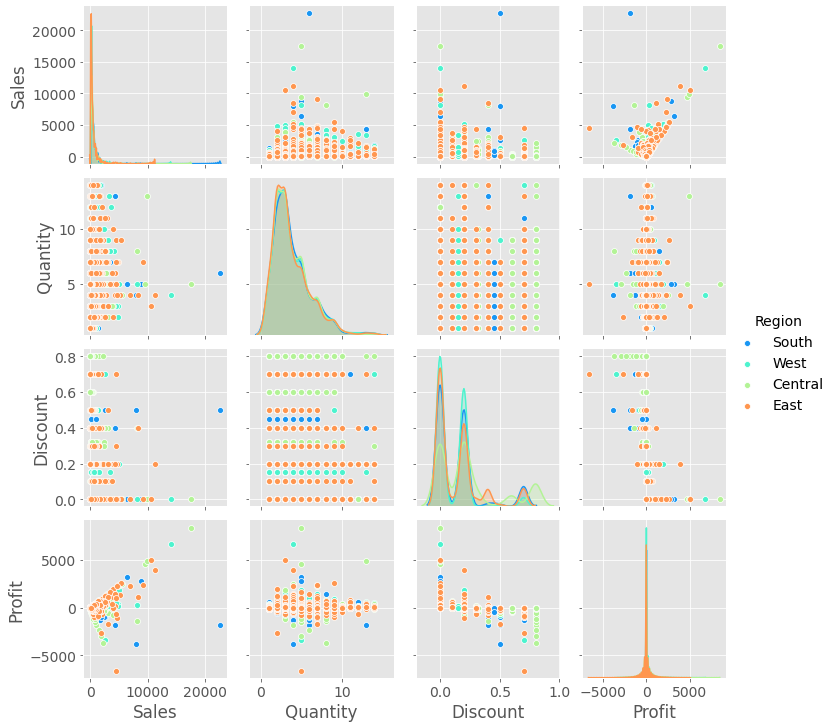

In [47]:
#sns.pairplot(df, hue="region", palette="rainbow")
sns.pairplot(data=dfq,hue="Region", palette="rainbow")

# **Pairplot**

In [48]:
df_a['Profit']

Region
Central     39655.8752
East        91506.3092
South       46749.4303
West       108329.8079
Name: Profit, dtype: float64

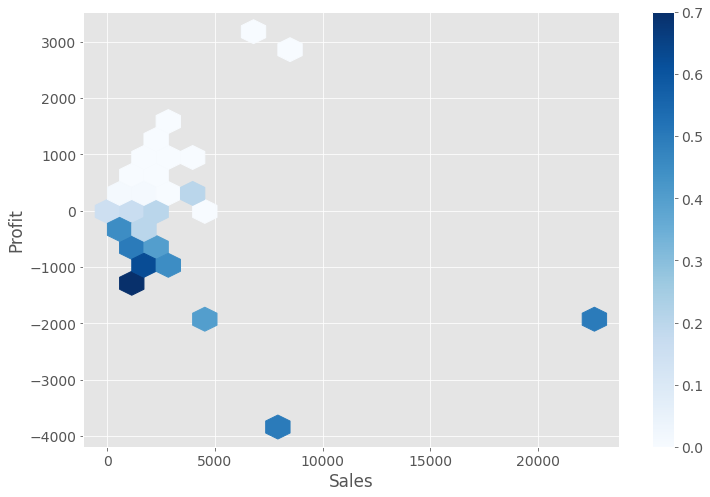

In [49]:
df[df['Region'] == "South"].plot(
    kind='hexbin',
    x='Sales',
    y='Profit',
    C='Discount',
    gridsize=20,
    figsize=(12,8),
    cmap="Blues", # defaults to greenish
    sharex=False # required to get rid of a bug
)


## **Hexbin showing relation between Sales, Profit and Discount.**

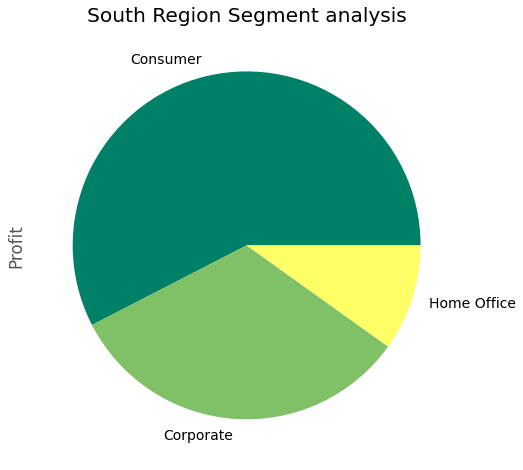

In [50]:
df[df['Region'] == "South"].groupby(
    ['Segment']
)['Profit'].sum().plot(
    kind='pie',
    figsize=(12,8),
    cmap="summer",
    title="South Region Segment analysis" # defaults to orangish
)

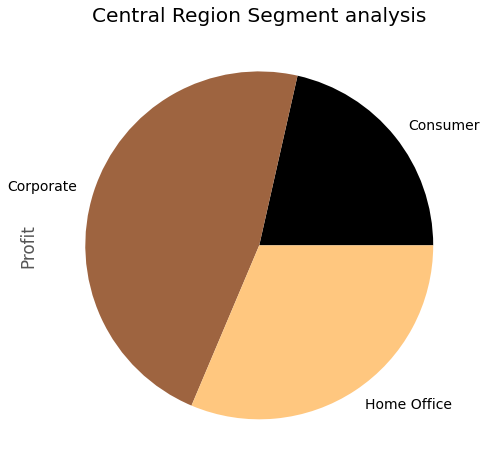

In [51]:
df[df['Region'] == "Central"].groupby(
    ['Segment']
)['Profit'].sum().plot(
    kind='pie',
    figsize=(12,8),
    cmap="copper",
    title="Central Region Segment analysis" # defaults to orangish
)

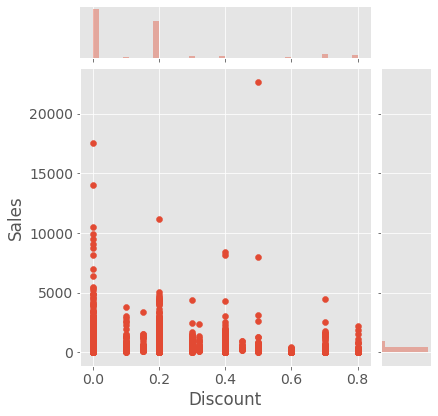

In [52]:
sns.jointplot(
    x='Discount',
    y='Sales',
    data=df,
    kind='scatter' # or 'kde' or 'hex'
)


## **Sales versus Discount**

In [53]:
import seaborn as sns

Text(0.5, 1.0, 'City wise Profit')

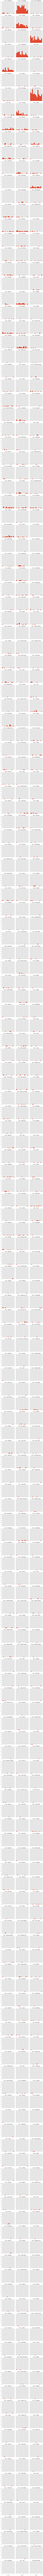

In [54]:
g = sns.FacetGrid(df, col="City", col_wrap=3,height=4)
g = (g.map(plt.hist, "Profit",bins=np.arange(2,9,0.5)))
plt.title("City wise Profit")


# **City wise Profit**

In [55]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Text(0.5, 1.0, 'State wise Profit')

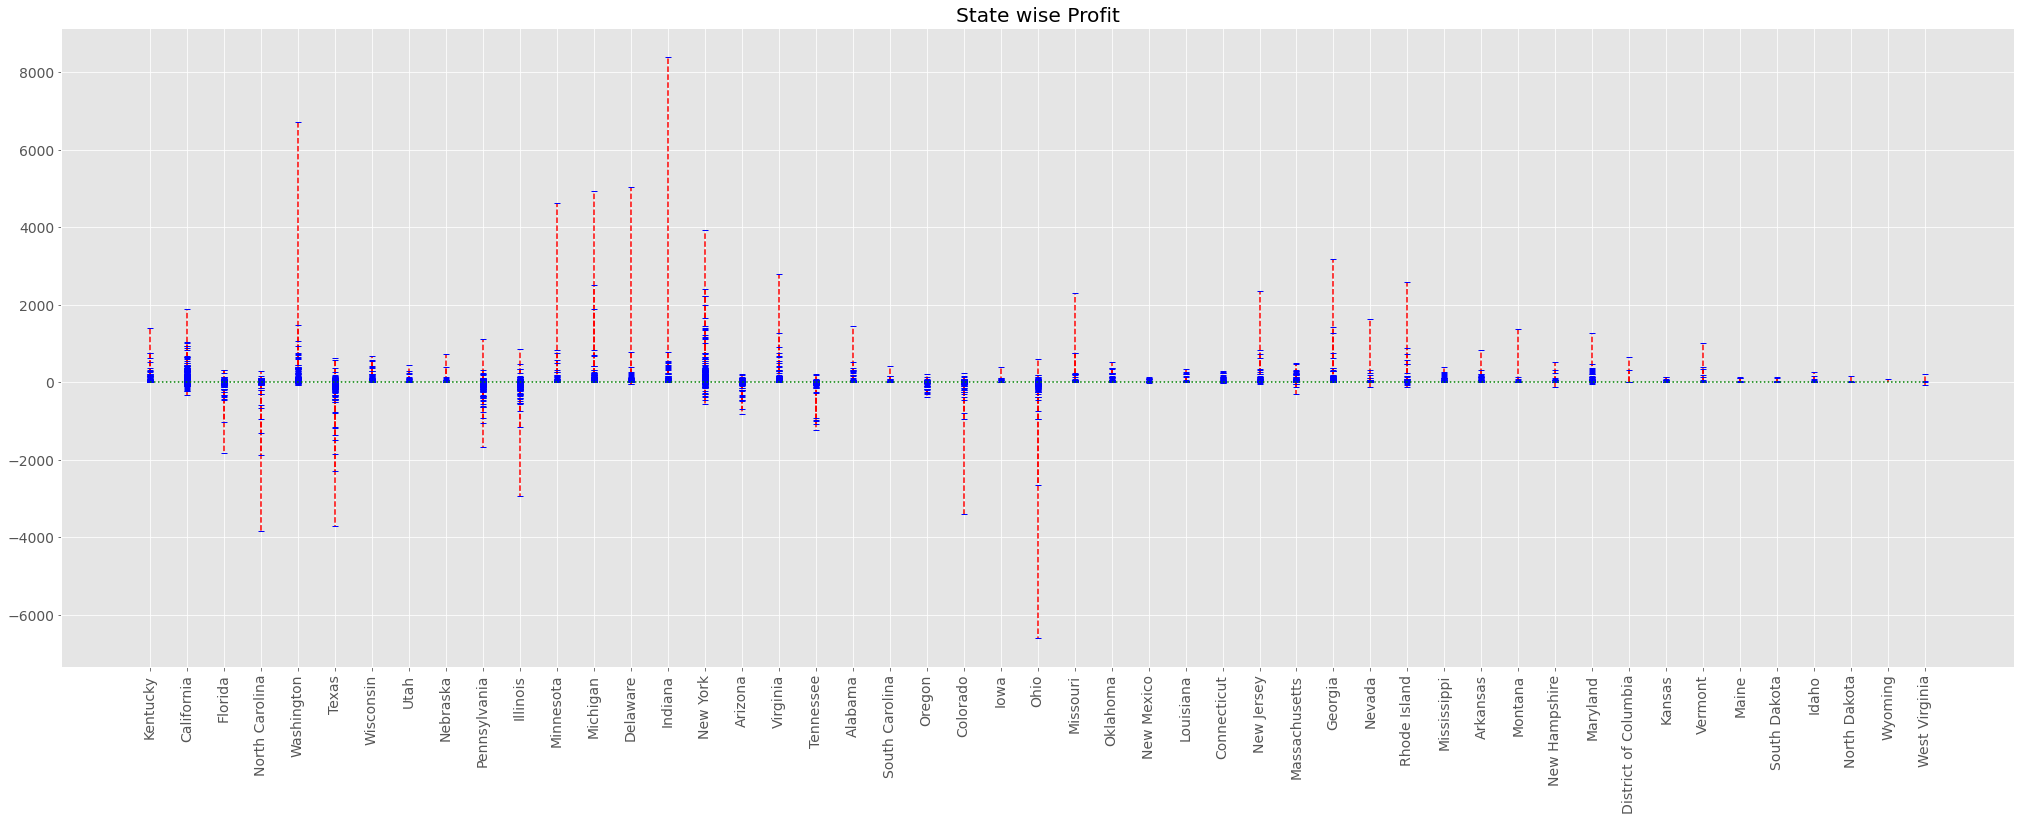

In [56]:
plt.figure(figsize=(35,40))

plt.subplot(311)
plt.stem(df['State'],
         df['Profit'],
         markerfmt = 'b_',
         linefmt = 'r--',
         use_line_collection=True,
         basefmt = 'g:')
plt.xticks(rotation=90)
plt.title('State wise Profit')


## **It can be observed that Indiana has maximum profits and Chio is suffering from loss.**

# **SUMMARY**

Overall Profit and Sales is maximum in the East and West region, Central and South region needs improvements.

Technology Category has maximum of Sales. Furniture has the second-highest Sales whereas Office Supplies has a minimum.

It is observed that Binders, Paper, Furnishing are among the most popular products whereas Copiers and Machines are not.

Subcategories needing improvement are- Copiers, Machines, Supplies, Fasteners, Envelopes.

The consumer segment is most active whereas the Home Office is least active.

California, New York, Texas seem to be active whereas Rhode Island, Arkansas, Alabama need attention.

It can be observed that Indiana has maximum profits and Chio is suffering from loss.
